In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data= pd.read_csv('Position_Salaries.csv')
x= data.iloc[:,1:-1].values
y= data.iloc[:,-1].values

In [9]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [28]:
y= y.reshape(len(y),1)
y


array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()
x= sc_x.fit_transform(x)
y= sc_y.fit_transform(y)

In [30]:
print(x,'\n\n',y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

 [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [38]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(x,y)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [39]:
sc_y.inverse_transform(regressor.predict(sc_x.fit_transform([[6.5]])))

array([131106.77303274])

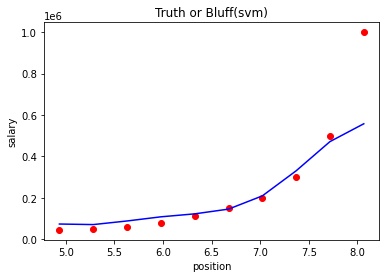

In [40]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color='blue')
plt.title('Truth or Bluff(svm)')
plt.xlabel('position')
plt.ylabel('salary')
plt.show()